In [1]:
import random
import time
import warnings
from datetime import datetime

import torch
import os

import numpy as np
import warnings
np.warnings = warnings
import matplotlib.pyplot as plt
from tabpfn_new.scripts.differentiable_pfn_evaluation import eval_model_range
from tabpfn_new.scripts.model_builder import get_model, get_default_spec, save_model, load_model
from tabpfn_new.scripts.transformer_prediction_interface import transformer_predict, get_params_from_config, load_model_workflow

from tabpfn_new.scripts.model_configs import *

#from datasets import load_openml_list, open_cc_dids, open_cc_valid_dids
from tabpfn_new.priors.utils import plot_prior, plot_features
from tabpfn_new.priors.utils import uniform_int_sampler_f

from tabpfn_new.scripts.tabular_metrics import calculate_score_per_method, calculate_score
from tabpfn_new.scripts.tabular_evaluation import evaluate

from tabpfn_new.priors.differentiable_prior import DifferentiableHyperparameterList, draw_random_style, merge_style_with_info
from tabpfn_new.scripts import tabular_metrics
from tabpfn.notebook_utils import *

In [2]:
dir_path = os.path.abspath(os.getcwd())
run_name = "small_net_mlp_variable_balance"
path = dir_path + f"/logs/trainrun_{run_name}"
filename = "model"
model, config = load_model(path, filename, device="cpu", eval_positions=None, verbose=0)

!! Warning: GPyTorch must be installed !!
Using style prior: True
Using cpu:0 device
Using a Transformer with 6.48 M parameters


In [3]:
config["epoch_frac"] = 0.5
dl = get_model(config, device="cpu", should_train=False, verbose=0)[3]

Using style prior: True
Using cpu:0 device
Using a Transformer with 6.48 M parameters


In [4]:
for key in config:
    #if key == "check_is_compatible":
    print(key, config[key])
for key in config["differentiable_hyperparameters"]:
    print(key, config["differentiable_hyperparameters"][key])

lr 0.0001
dropout 0.0
emsize 256
batch_size 1
nlayers 12
num_features 100
nhead 4
nhid_factor 2
bptt 1152
eval_positions [1094]
seq_len_used 50
sampling mnd
epochs 100
num_steps 400
verbose False
mix_activations True
pre_sample_causes True
multiclass_type variable_balance
nan_prob_unknown_reason_reason_prior 0.5
categorical_feature_p 0
nan_prob_no_reason 0.0
nan_prob_unknown_reason 0.0
nan_prob_a_reason 0.0
max_num_classes 2
num_classes 2
noise_type Gaussian
balanced True
normalize_to_ranking False
set_value_to_nan 0.0
normalize_by_used_features True
num_features_used <function load_model.<locals>.<lambda> at 0x000002662AB4E840>
num_categorical_features_sampler_a -1.0
differentiable_hyperparameters {'prior_bag_exp_weights_1': {'distribution': 'uniform', 'min': 2.0, 'max': 10.0}, 'num_layers': {'distribution': 'meta_gamma', 'max_alpha': 2, 'max_scale': 3, 'round': True, 'lower_bound': 2}, 'prior_mlp_hidden_dim': {'distribution': 'meta_gamma', 'max_alpha': 3, 'max_scale': 100, 'round': T

tensor([2.3026, 0.1054])
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99] [4.60517019 3.91202301 3.5065579  3.21887582 2.99573227 2.81341072
 2.65926004 2.52572864 2.40794561 2.30258509 2.20727491 2.12026354
 2.04022083 1.96611286 1.89711998 1.83258146 1.77195684 1.71479843
 1.66073121 1.60943791 1.56064775 1.51412773 1.46967597 1.42711636
 1.38629436 1.34707365 1.30933332 1.27296568 1.23787436 1.2039728
 1.17118298 1.13943428 1.10866262 1.07880966 1.04982212 1.02165125
 0.99425227 0.96758403 0.94160854 0.91629073 0.89159812 0.86750057
 0.8

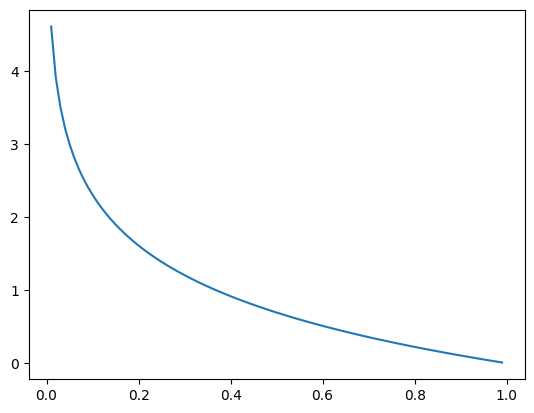

In [22]:
a = torch.tensor([0.1,0.9])
print(-torch.log(a))
b = np.arange(0.01,1,0.01)
print(b, -np.log(b))
plt.plot(b, -np.log(b))

In [8]:

for i in range(1000):
    #print(f"\n\n\nRun #{i}")
    src, targets, pos = next(iter(dl))
    #pos = 800
    #print(src[1].shape)
    targets = targets[pos:]
    output = model[2](src, single_eval_pos=pos)
    preds = torch.argmax(output, dim=-1).float()
    print(torch.mean((preds==targets)[targets!=-100].float()))

tensor(0.8303)
tensor(0.8837)
tensor(0.7426)
tensor(0.9234)
tensor(0.8933)
tensor(0.8442)
tensor(0.8750)
tensor(0.6825)
tensor(0.9477)
tensor(0.8393)
tensor(0.9323)
tensor(0.7379)
tensor(0.6135)
tensor(0.9195)
tensor(0.6422)
tensor(0.8159)
tensor(0.7606)
tensor(0.6312)
tensor(0.6523)
tensor(0.9368)
tensor(0.6869)
tensor(0.9007)
tensor(0.3574)



KeyboardInterrupt

